# Heart Disease UCI – 2.2 Dimensionality Reduction (PCA)

Focused implementation of Project Section 2.2: Principal Component Analysis (PCA).

## Objectives
- Standardize feature space.
- Fit PCA on full feature matrix.
- Determine minimum number of components retaining ≥95% variance.
- Visualize cumulative explained variance and 2D projection (first two PCs).
- Export PCA-transformed datasets (full and reduced) for downstream modeling.

## Deliverables
✔️ Cumulative variance plot with 95% threshold line  
✔️ 2D scatter of first two principal components (colored by target)  
✔️ Chosen component count (printed)  
✔️ Exported datasets: `pca_full_components.csv`, `pca_reduced_components.csv`  
✔️ Variance table saved: `pca_variance_report.csv`  

## Workflow Outline
1. Imports & Configuration  
2. Data Load & Quick Peek  
3. Scaling  
4. PCA Fitting & Variance Analysis  
5. Visualization (Cumulative Variance + 2D Scatter)  
6. Export PCA Outputs  
7. Summary & Next Steps  




In [9]:
# === 1. Imports & Configuration ===
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams['figure.dpi'] = 110
print('Imports loaded (PCA only).')

Imports loaded (PCA only).


In [10]:
# === 2. Data Load & Quick Peek ===
DATA_PATH = '../data/cleaned_data.csv'
df = pd.read_csv(DATA_PATH)
print(f'Shape: {df.shape}')
df.head()

Shape: (920, 22)


,age,trestbps,chol,thalch,oldpeak,ca,num,chol_per_age,heart_rate_reserve,risk_score,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0,0,3.698412,5.0,2,...,False,True,True,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,3,1,4.268656,-52.0,2,...,False,False,False,False,False,True,True,False,True,False
2,67,120.0,229.0,129.0,2.6,2,1,3.417910,9.0,1,...,False,False,False,False,False,True,True,False,False,True
3,37,130.0,250.0,187.0,3.5,0,0,6.756755,57.0,1,...,True,False,False,True,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0,0,4.975609,42.0,0,...,False,False,False,False,False,False,False,True,True,False


In [11]:
# === 3. Scaling ===
# Separate features (exclude target) and apply StandardScaler.
TARGET_COL = 'num'
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Feature matrix scaled. Shape:', X_scaled.shape)

Feature matrix scaled. Shape: (920, 21)


Chosen number of components (>=95% variance): 15


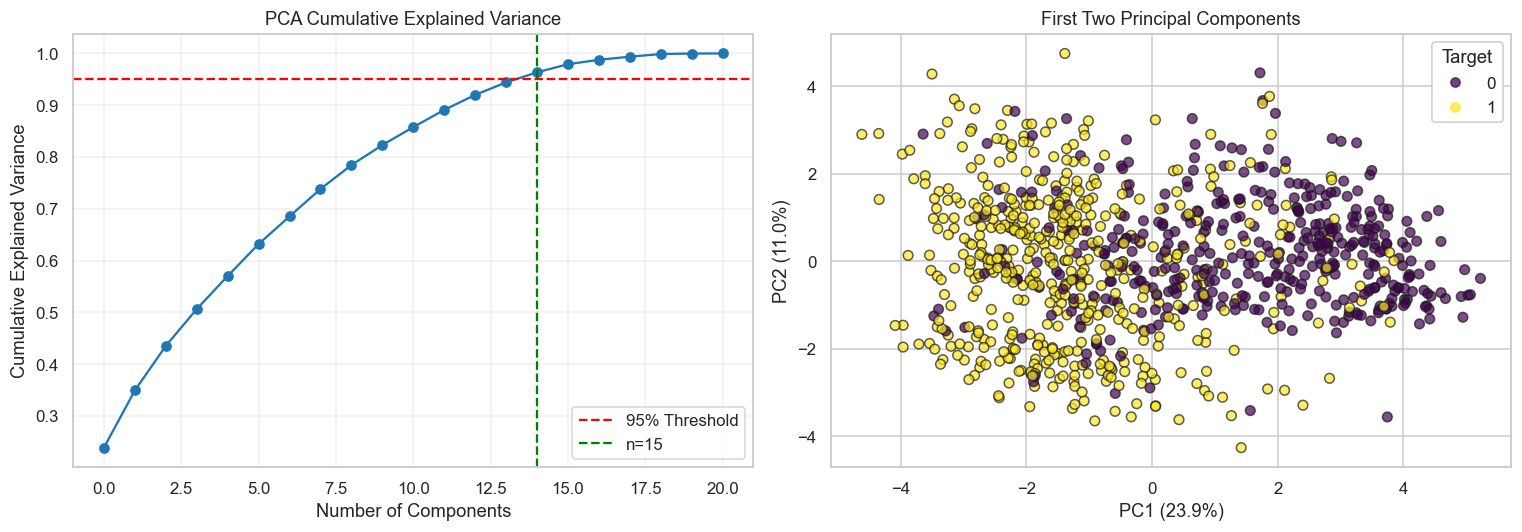

Reduced PCA matrix shape: (920, 15)


In [12]:
# === 4. PCA (Explained Variance & 2D Projection) ===
# Fit full PCA to inspect cumulative explained variance.
pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)
threshold = 0.95
n_components = int(np.argmax(cum_var >= threshold) + 1)
print(f'Chosen number of components (>=95% variance): {n_components}')

fig, ax = plt.subplots(1, 2, figsize=(14,5))
# (a) Cumulative explained variance plot
ax[0].plot(cum_var, marker='o', color='#1f77b4')
ax[0].axhline(threshold, ls='--', color='red', label='95% Threshold')
ax[0].axvline(n_components-1, ls='--', color='green', label=f'n={n_components}')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Cumulative Explained Variance')
ax[0].set_title('PCA Cumulative Explained Variance')
ax[0].legend()
ax[0].grid(alpha=0.3)

# (b) 2D scatter using first two PCs
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
scatter = ax[1].scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='viridis', alpha=0.7, edgecolor='k', s=40)
ax[1].set_xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]:.1%})')
ax[1].set_ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]:.1%})')
ax[1].set_title('First Two Principal Components')
legend1 = ax[1].legend(*scatter.legend_elements(), title='Target')
ax[1].add_artist(legend1)
plt.tight_layout()
plt.show()

# Fit final PCA with selected dimensionality
pca_final = PCA(n_components=n_components)
X_pca_reduced = pca_final.fit_transform(X_scaled)
print('Reduced PCA matrix shape:', X_pca_reduced.shape)

In [13]:
# === 5. Variance Report & Component Selection Summary ===
explained = pca_full.explained_variance_ratio_
variance_df = (pd.DataFrame({
    'component': np.arange(1, len(explained)+1),
    'explained_variance_ratio': explained,
    'cumulative_variance': np.cumsum(explained)
}))
print('Top 10 components by individual variance:')
print(variance_df.head(10))
print('\nChosen components (>=95% cumulative variance):', n_components)

# Save variance report
table_path = '../data/pca_variance_report.csv'
variance_df.to_csv(table_path, index=False)
print(f'Variance report saved to: {table_path}')
variance_df.head()

Top 10 components by individual variance:
   component  explained_variance_ratio  cumulative_variance
0          1                  0.238592             0.238592
1          2                  0.110474             0.349066
2          3                  0.086154             0.435220
3          4                  0.071014             0.506234
4          5                  0.063865             0.570099
5          6                  0.061699             0.631798
6          7                  0.053495             0.685293
7          8                  0.052872             0.738164
8          9                  0.046256             0.784420
9         10                  0.038580             0.823000

Chosen components (>=95% cumulative variance): 15
Variance report saved to: ../data/pca_variance_report.csv
Variance report saved to: ../data/pca_variance_report.csv


,component,explained_variance_ratio,cumulative_variance
0,1,0.238592,0.238592
1,2,0.110474,0.349066
2,3,0.086154,0.435220
3,4,0.071014,0.506234
4,5,0.063865,0.570099


In [14]:
# === 6. Export: Full PCA Component Matrix ===
# Full component matrix (all original components) for optional downstream analysis
X_pca_full_matrix = pca_full.transform(X_scaled)
full_cols = [f'PC{i}' for i in range(1, X_pca_full_matrix.shape[1]+1)]
full_df = pd.DataFrame(X_pca_full_matrix, columns=full_cols)
full_df.insert(0, 'target', y.values)
full_out = '../data/pca_full_components.csv'
full_df.to_csv(full_out, index=False)
print(f'Full PCA component matrix saved to: {full_out}')
full_df.head()

Full PCA component matrix saved to: ../data/pca_full_components.csv


,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0,-0.489549,2.182384,-1.822361,0.767597,0.200556,1.045469,3.454578,2.800170,1.325818,...,0.288618,0.511381,0.971526,0.128180,-0.870010,-0.775782,-1.373888,-0.736095,-0.069747,0.001543
1,1,-2.692351,1.923359,0.221825,-2.201416,-0.362671,-0.291906,0.538385,-0.541987,-1.085232,...,1.256341,1.408190,-1.542364,-0.681537,-0.356006,-0.118180,0.252176,0.063158,-0.060682,0.005486
2,1,-2.616191,0.075019,0.614685,1.166307,0.482672,-0.151829,0.580845,-0.256370,-1.800568,...,-0.133076,0.794470,-0.669090,-0.198288,-0.760963,-0.835042,0.183718,0.349579,0.028371,0.002240
3,0,2.794853,0.295663,1.294772,1.061320,1.935885,1.210252,1.211643,-1.243387,0.374942,...,0.732496,1.612965,1.335566,-0.122445,0.530030,0.768940,-0.074393,-1.112300,0.173247,-0.009354
4,0,3.929070,0.068443,-0.302623,-0.144740,-0.328114,-1.808626,0.683949,-0.488551,-0.917535,...,-0.164508,-0.124632,0.558791,-0.195461,-1.413702,-0.348120,-0.023441,0.245377,0.033820,-0.005157


In [15]:
# === 7. Export: Reduced PCA Dataset (>=95% Variance) ===
reduced_cols = [f'PC{i}' for i in range(1, n_components+1)]
reduced_df = pd.DataFrame(X_pca_reduced, columns=reduced_cols)
reduced_df.insert(0, 'target', y.values)
reduced_out = '../data/pca_reduced_components.csv'
reduced_df.to_csv(reduced_out, index=False)
print(f'Reduced PCA dataset saved to: {reduced_out}')
reduced_df.head()

Reduced PCA dataset saved to: ../data/pca_reduced_components.csv


,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0,-0.489549,2.182384,-1.822361,0.767597,0.200556,1.045469,3.454578,2.800170,1.325818,-0.920846,-0.152528,0.288618,0.511381,0.971526,0.128180
1,1,-2.692351,1.923359,0.221825,-2.201416,-0.362671,-0.291906,0.538385,-0.541987,-1.085232,2.298472,-0.006350,1.256341,1.408190,-1.542364,-0.681537
2,1,-2.616191,0.075019,0.614685,1.166307,0.482672,-0.151829,0.580845,-0.256370,-1.800568,0.952024,0.225565,-0.133076,0.794470,-0.669090,-0.198288
3,0,2.794853,0.295663,1.294772,1.061320,1.935885,1.210252,1.211643,-1.243387,0.374942,-0.577287,1.626042,0.732496,1.612965,1.335566,-0.122445
4,0,3.929070,0.068443,-0.302623,-0.144740,-0.328114,-1.808626,0.683949,-0.488551,-0.917535,-0.948324,1.178306,-0.164508,-0.124632,0.558791,-0.195461


In [16]:
# === 8. Deliverables Recap ===
print('Deliverables Generated:')
print(' - Cumulative variance plot (Cell 5 earlier)')
print(' - 2D PCA scatter of first two components (Cell 5 earlier)')
print(f' - Variance report CSV: {table_path}')
print(f' - Full PCA matrix CSV: {full_out}')
print(f' - Reduced PCA matrix CSV: {reduced_out}')
print(f' - Chosen component count: {n_components}')

Deliverables Generated:
 - Cumulative variance plot (Cell 5 earlier)
 - 2D PCA scatter of first two components (Cell 5 earlier)
 - Variance report CSV: ../data/pca_variance_report.csv
 - Full PCA matrix CSV: ../data/pca_full_components.csv
 - Reduced PCA matrix CSV: ../data/pca_reduced_components.csv
 - Chosen component count: 15


---
## Summary & Next Steps
PCA applied to standardized features. A minimal set of components retaining ≥95% variance was selected and exported alongside the full component matrix.

| Artifact | Path |
|----------|------|
| Variance Report | `../data/pca_variance_report.csv` |
| Full PCA Components | `../data/pca_full_components.csv` |
| Reduced PCA Components (≥95%) | `../data/pca_reduced_components.csv` |

### Key Figures
- Cumulative variance curve with 95% threshold
- 2D scatter (PC1 vs PC2) colored by target
- Chosen component count: displayed above

Notebook 2.2 complete.